In [166]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import ticker

In [167]:
dados = pd.read_csv('/content/A172121189_28_143_208.csv', encoding='ISO 8859-1', skiprows=3, skipfooter=12, sep = ';', thousands='.', 
decimal=',')

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: ParserWarning: Falling back to the 'python' engine because the 'c' engine does not support skipfooter; you can avoid this warning by specifying engine='python'.
  


In [168]:
colunas_usaveis = dados.mean().index.tolist() # Transforma a linha que contém os meses em index e os coloca/transforma em uma lista (listas são mutáveis, index não são)
colunas_usaveis.insert(0, 'Unidade da Federação')

usaveis = dados[colunas_usaveis]

#Transformando a coluna 'Unidade da Federação' em índice, desta forma, eliminando o índice numérico (que vai de 0 até 26).
usaveis = usaveis.set_index('Unidade da Federação')

#Ordenando os gastos do mais alto ao mais baixo (quem gastou mais):
estados_que_gastaram_mais = usaveis.sort_values('Total', ascending=False)  # sort_values por padrão ordena do mais baixo ao mais alto, ascending=False ordena do mais alto ao mais baixo.
estados_que_gastaram_mais = estados_que_gastaram_mais.drop('Total', axis=1) # Retirando a coluna Total
estados_que_gastaram_mais.head() # Os 5 estados que mais gastaram

colunas_analisaveis = estados_que_gastaram_mais.columns[6:] # Slice por posição, para isso precisa pegar as colunas.
estados_que_gastaram_mais = estados_que_gastaram_mais[colunas_analisaveis]

pernambuco = estados_que_gastaram_mais.loc['26 Pernambuco',]

**Desafio 01: Crie um gráfico comparando os 5 estados que mais gastaram com um estado de sua escolha (minha escolha: Pernambuco).**

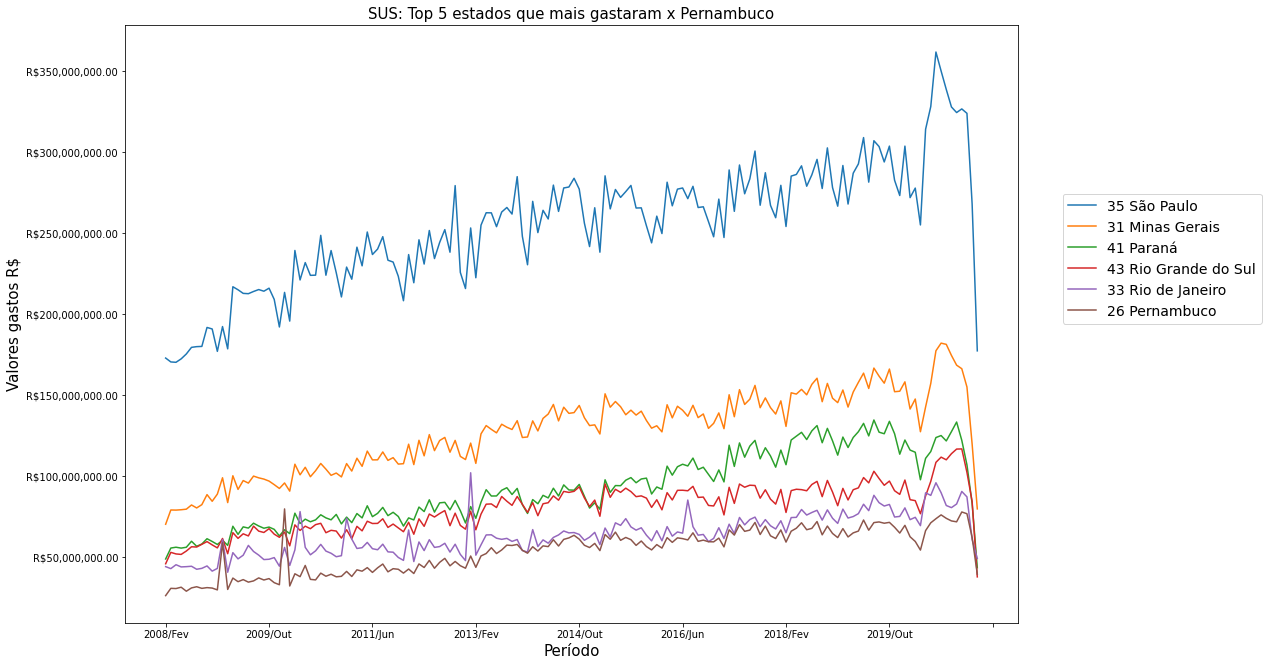

In [169]:
# Criando o gráfico Desafio aula 03
ax1 = estados_que_gastaram_mais.head().T.plot(figsize=(16, 11))
ax2 = pernambuco.plot(figsize=(16, 11))

# Criando os labels
plt.xlabel('Período', fontsize=15)
plt.ylabel('Valores gastos R$', fontsize=15)

#Definindo o título do gráfico:
plt.title('SUS: Top 5 estados que mais gastaram x Pernambuco', fontsize=15)

# Estanciando os gráficos
ax1,ax2.yaxis.set_major_formatter(ticker.StrMethodFormatter("R${x:,.2f}")) # Configurando os valores do eixo X
ax1,ax2.legend(fontsize=14, loc=(1.05, 0.5)) # Coloca a legenda do lado de fora do gráfico

plt.show()

**Desafio 02: Criar um gráfico com apenas os estados do Sudeste para avaliar se houve um pico de internações no mesmo período (2013/Fev).**

In [170]:
coluna_regiao = []
regiao = ['Norte', 'Nordeste', 'Sudeste', 'Sul', 'Centro-Oeste']

for i in usaveis.index:
  if i[0] == '1':
    #print(i)
    coluna_regiao.append(regiao[0])
  
  if i[0] == '2':
    #print(i)
    coluna_regiao.append(regiao[1])

  if i[0] == '3':
    #print(i)
    coluna_regiao.append(regiao[2])
  
  if i[0] == '4':
    #print(i)
    coluna_regiao.append(regiao[3])

  if i[0] == '5':
    #print(i)
    coluna_regiao.append(regiao[4])


In [171]:
usaveis.insert(0, 'Região', coluna_regiao, allow_duplicates=False)

In [172]:
sudeste = usaveis[usaveis['Região'] == 'Sudeste']

In [173]:
sudeste_analisaveis = sudeste.columns[7:] # Eliminando as colunas anteriores a 2008/Fev.
sudeste = sudeste[sudeste_analisaveis]

In [174]:
sudeste = sudeste.drop('Total', axis=1)

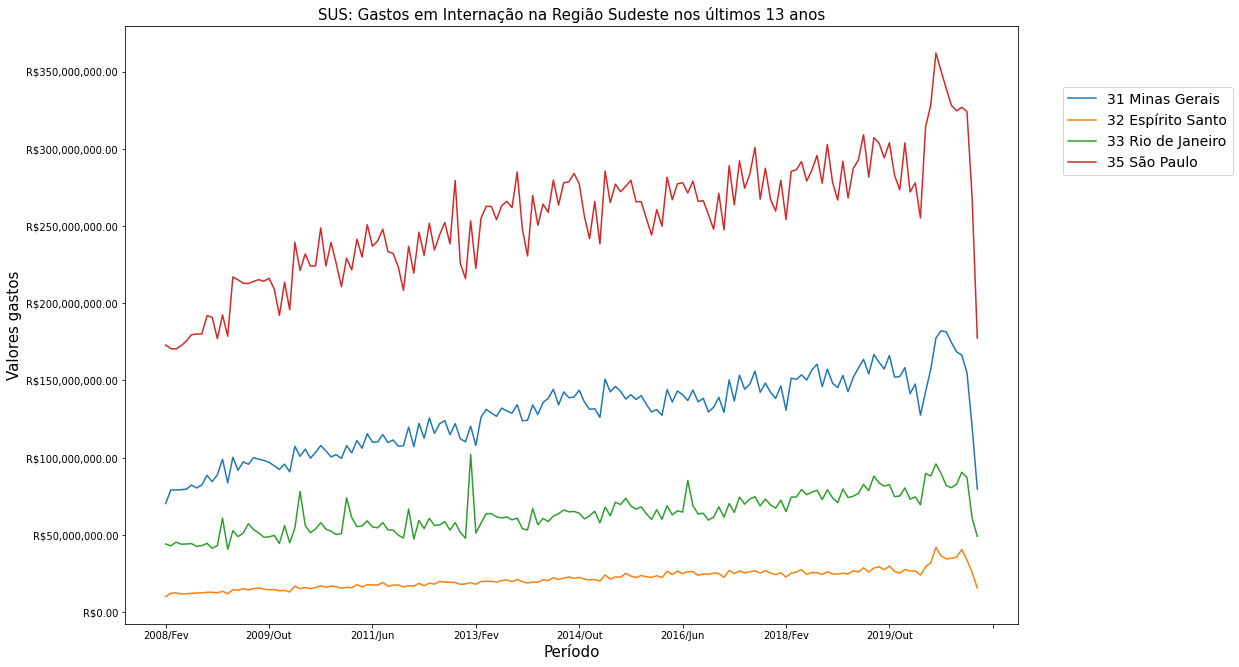

In [175]:
ax = sudeste.T.plot(figsize=(16, 11))

# Criando os labels
plt.xlabel('Período', fontsize=15)
plt.ylabel('Valores gastos', fontsize=15)

#Definindo o título do gráfico:
plt.title('SUS: Gastos em Internação na Região Sudeste nos últimos 13 anos', fontsize=15)

ax.legend(fontsize=14, loc=(1.05, 0.75)) # Coloca a legenda do lado de fora do gráfico
ax.yaxis.set_major_formatter(ticker.StrMethodFormatter("R${x:,.2f}")) # Configurando os valores do eixo X

plt.show()

Como podemos avaliar no gráfico acima apenas os estados de São Paulo e Rio de Janeiro apresentam picos de gastos em fevereiro de 2013. Este padrão não sustenta uma epidemia de dengue generalizada na região Sudeste.

Agora, analizemos o gráfico abaixo com os dados de todo o ano de 2013.

In [180]:
sudeste_2013 = sudeste.iloc[:, 59:71]

**Desafio 06: Plotar o gráfico dos custos apenas dos estados da região sudeste e verificar se os picos de 2013/Fev teve comportamento similar em todos os demais estados da região.**

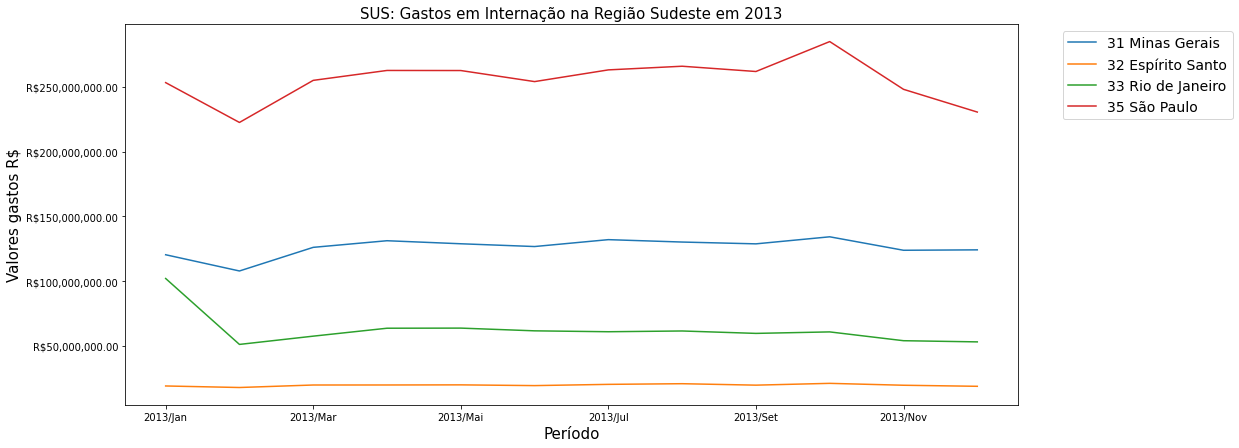

In [181]:
ax = sudeste_2013.T.plot(figsize=(16, 7))

# Criando os labels
plt.xlabel('Período', fontsize=15)
plt.ylabel('Valores gastos R$', fontsize=15)

#Definindo o título do gráfico:
plt.title('SUS: Gastos em Internação na Região Sudeste em 2013', fontsize=15)

ax.legend(fontsize=14, loc=(1.05, 0.75)) # Coloca a legenda do lado de fora do gráfico
ax.yaxis.set_major_formatter(ticker.StrMethodFormatter("R${x:,.2f}")) # Configurando os valores do eixo X

plt.show()

Podemos perceber que há um gasto constante e sem grandes variações em todo o ano de 2013 na região. Com exceção do mês de Janeiro nos estados de São Paulo e Rio de Janeiro, não há aumento significativo nos gastos em hospitais daquele ano de forma geral na região Sudeste. O que derruba a hipótese de que uma grande epidemia de dengue ou qualquer outra crise sanitária tenha ocorrido de forma generalizada na região.

Porém, isto não exclui que uma epidemia de dengue ou qualquer outra crise sanitária possa ter ocorrido nestes dois estados durante este período, é necessário uma investigação mais aprofundada para descobrir a razão deste pico nos gastos em saúde pública nos estados do Rio de Janeiro e São Paulo no mês de Janeiro de 2013. 

**Desafio 07: Adicionar seu estado escolhido novamente, deixe o gráfico informativo e tire conclusões sobre seus estados comparando com os demais. Tire suas conclusões e compartilhe com a gente.**

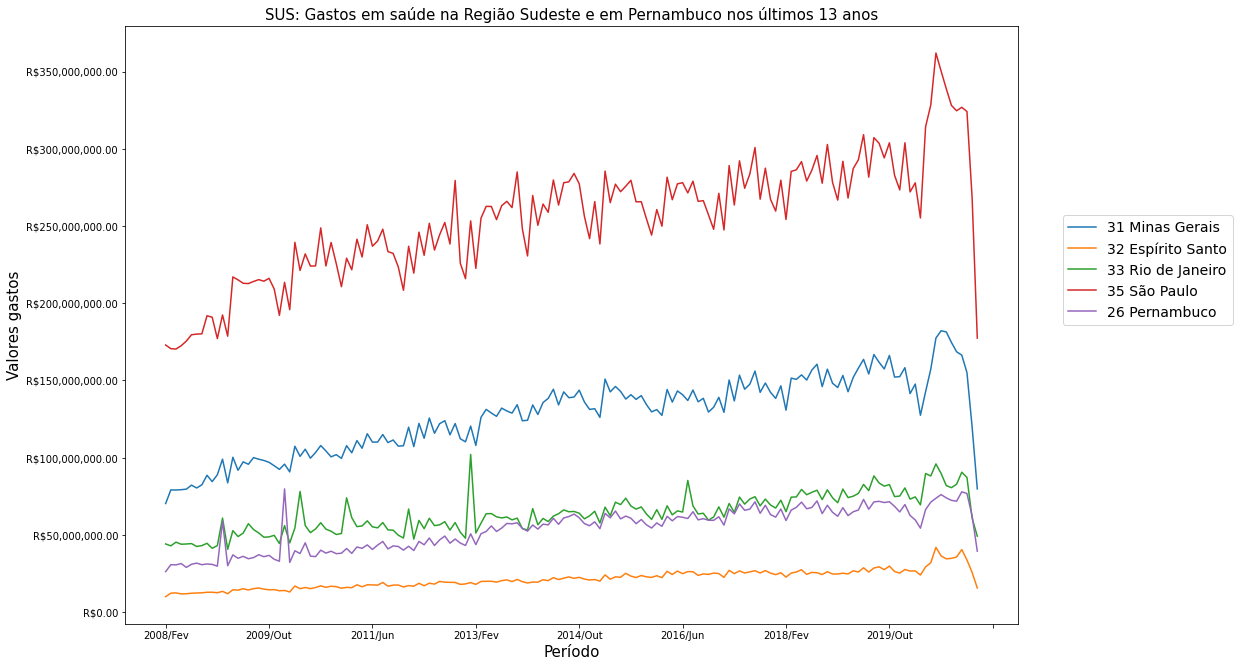

In [183]:
ax1 = sudeste.T.plot(figsize=(16, 11))
ax2 = pernambuco.plot(figsize=(16, 11))

# Criando os labels
plt.xlabel('Período', fontsize=15)
plt.ylabel('Valores gastos', fontsize=15)

#Definindo o título do gráfico:
plt.title('SUS: Gastos em saúde na Região Sudeste e em Pernambuco nos últimos 13 anos', fontsize=15)

# Estanciando os gráficos
ax1,ax2.yaxis.set_major_formatter(ticker.StrMethodFormatter("R${x:,.2f}")) # Configurando os valores do eixo X
ax1,ax2.legend(fontsize=14, loc=(1.05, 0.5)) # Coloca a legenda do lado de fora do gráfico

plt.show()

Todos os estados apresentam um comportamento bem semelhante (embora em graus diferentes), no final do gráfico, de ascenção, estabilização elevada, seguida de queda abrupta no mesmo período do ano, iniciando em outubro/novembro de 2019, época de registro recorde de casos de dengue em todo o país. Seria esta a razão da semelhança no gráfico? Vale a pena investigar mais a fundo.

Os estados de Pernambuco e Rio de Janeiro, de forma geral, parecem acompanhar um gasto regular relativamente semelhante, como podemos observar em seus gráficos, que variam de forma similar, salvo em alguns momentos em que existem pequenas diferenças e também a proporcionalidade de seus gastos de acordo com suas populações.

**Desafio 05: Buscar os casos de dengue no Brasil (época de maior número de casos e regiões mais atingidas) e se os picos de alguns estados em fevereiro e verão de modo geral, pode ser reflexos dos casos de dengue.**

[Brasil registra segundo ano com maior numero de casos de dengue da historia.](https://epocanegocios.globo.com/Brasil/noticia/2020/01/epoca-negocios-brasil-registra-segundo-ano-com-maior-numero-de-casos-de-dengue-da-historia.html)


Brasil registra segundo ano com maior número de casos de dengue da história,
quase dois terços das ocorrências foram em São Paulo, Minas e Espírito Santo.

O número de casos de dengue registrados no Brasil em 2019 foi o segundo mais alto da série histórica, segundo o Ministério da Saúde. Os dados, de janeiro a 7 de dezembro, apontam 1,527 milhão de notificações, concentradas principalmente nas regiões Centro-Oeste e Sudeste. Quase dois terços das ocorrências foram em São Paulo, Minas e Espírito Santo. E a tendência é de que os registros continuem altos em 2020. A série histórica do governo federal teve início em 1975. O ano passado fica atrás somente de 2015, quando houve quase 1,7 milhão de registros da doença no País, conforme o Sistema de Informação de Agravos de Notificação (Sinan), do ministério. Mas superou as notificações dos anos de 2017 e 2018, que registraram cerca de 239 mil e 266 mil casos prováveis da doença, respectivamente.

Só no Estado de São Paulo, em 2019 foram registrados cerca de 442 mil casos da doença, ante 19,7 mil casos no ano anterior. Na capital, o total de registros não foi alto (cerca de 16,8 mil). A doença se concentrou, principalmente, no oeste paulista, como na regiões de Ribeirão Preto e Presidente Prudente. Segundo o ministério, a doença costuma alternar biênios de alta e baixa incidência. Os anos de 2017 e 2018 haviam sido períodos com menos registros do vírus. Por isso, Said afirma ser possível que o quadro de alta de registros se mantenha este ano.

(Reportagem de 9 de janeiro, de 2019).

[30 anos de dengue no Rio de Janeiro: sua epidemiologia.](http://observatoriodasauderj.com.br/30-anos-de-dengue-no-rio-de-janeiro-sua-epidemiologia/)

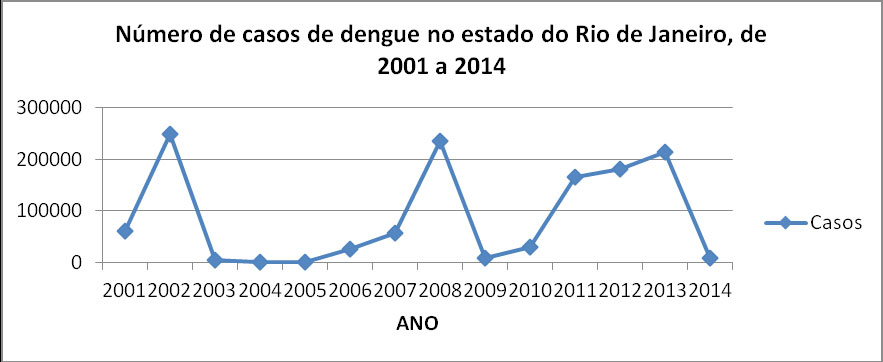
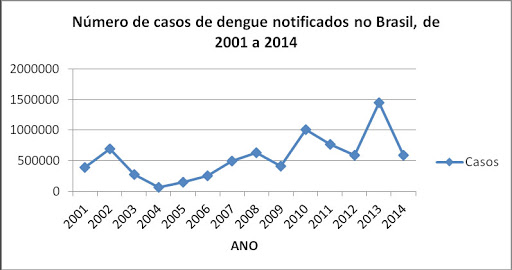

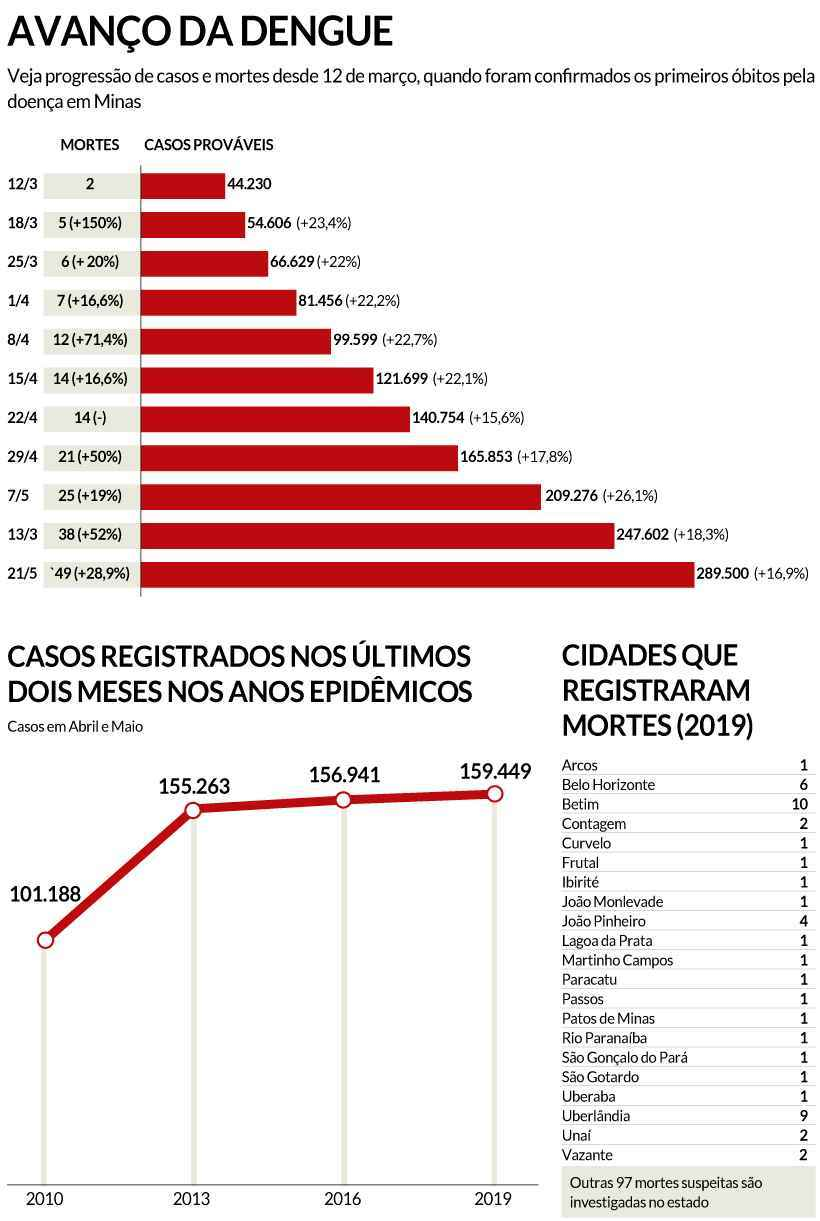

[Casos de dengue em abril e maio de 2019 superam outros anos epidêmicos](https://www.em.com.br/app/noticia/gerais/2019/05/22/interna_gerais,1055638/casos-de-dengue-em-abril-e-maio-de-2019-superam-outros-anos-epidemicos.shtml
)

[Estados e municípios: endividados e com receita em queda](https://www12.senado.leg.br/emdiscussao/edicoes/pacto-federativo/realidade-brasileira/endividados-e-com-receita-em-queda)

Reportagem interessante sobre a situação fiscal e financeira dos estados e de como isso afetas as secretarias de saúde. Nos faz meditar no quanto esta situação pode estar refletida nos dados que possuímos hoje.

Conclusão: Após analisarmos os gráficos e dados, de lermos os artigos e reportagens disponibilizados na internet podemos concluir que os anos com situações epidemiológicas mais críticas no Brasil são, 2009, 2010, 2015, 2019, 2020 e 2021 causados por doenças como a SARS (H1N1), dengue (entre outras febres tropicais) e COVID-19, ao mesmo tempo em que notamos um aumento significativo de gastos em saúde pública pelos estados brasileiros, salvos em algums picos observados nos gráficos em que não há, aparentemente, nenhuma correlação entre crescimento rápido de gastos e epidemias.